In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

def plotIteration(data, x_col, y_cols, ylabels, xlabel, ylabel, title=None):
    # Convert to numpy array for easier indexing
    data = np.array(data)

    # Extract columns
    x = data[:, x_col]

    plt.figure(figsize=(6, 4))
    for y_col, y_label in zip(y_cols, ylabels):
      y = data[:, y_col]
      plt.plot(x, y, marker="o", linestyle="-", label=f" {y_label} vs {xlabel}")

    # Plot

    plt.plot(x, y, marker="o", linestyle="-", label=f"col {y_col} vs col {x_col}")
    plt.xlabel(xlabel if xlabel else f"Column {x_col}")
    plt.ylabel(ylabel if ylabel else f"Column {y_col}")
    plt.title(title if title else f"Plot of col {y_col} vs col {x_col}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
def printArray(data):
  print("k\t\t\t\ta\t\t\t\tb\t\t\t\tc\t\t\t\tf(c)")
  for i in data:
    iter = [round(x,5) for x in i]
    iter = [str(x).zfill(5) for x in iter]
    iter = [print(v,end="\t\t\t") for v in iter]
    print()

def BolzanoIter(a,b,tol,mathFunct,max_iter=40):
  fA = mathFunct(a)
  fB = mathFunct(b)
  values = []
  if (fA>0 and fB<0) or (fA<0 and fB>0):
    for i in range(max_iter):
      c = (a+b)/2
      fC = mathFunct(c)
      preValues = [i,a,b,c,fC]
      values.append([float(v) for v in preValues])
      if abs(fC) <= tol:
        return [c, values]
      if (fC > 0 and fA < 0) or (fC < 0 and fA > 0):
        b = c
      else:
        a = c
        fA = fC
    return [(a+b)/2,values]
  else:
    print("There's no root inside the interval...")

The root is: 1.114156723022461 for a tolerance equals 1e-06


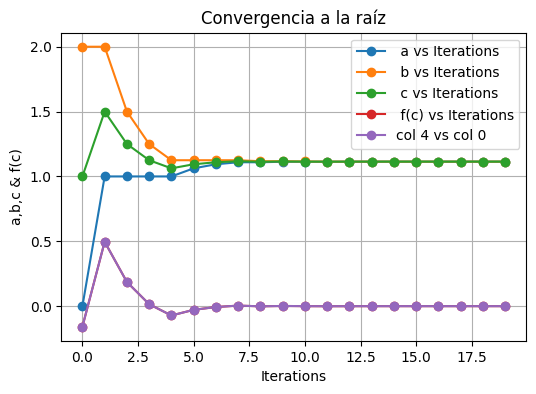

k				a				b				c				f(c)
000.0			000.0			002.0			001.0			-0.15853			
001.0			001.0			002.0			001.5			0.49624			
002.0			001.0			001.5			01.25			0.18623			
003.0			001.0			01.25			1.125			0.01505			
004.0			001.0			1.125			1.0625			-0.07183			
005.0			1.0625			1.125			1.09375			-0.02836			
006.0			1.09375			1.125			1.10938			-0.00664			
007.0			1.10938			1.125			1.11719			0.00421			
008.0			1.10938			1.11719			1.11328			-0.00122			
009.0			1.11328			1.11719			1.11523			0.0015			
010.0			1.11328			1.11523			1.11426			0.00014			
011.0			1.11328			1.11426			1.11377			-0.00054			
012.0			1.11377			1.11426			1.11401			-0.0002			
013.0			1.11401			1.11426			1.11414			-3e-05			
014.0			1.11414			1.11426			1.1142			6e-05			
015.0			1.11414			1.1142			1.11417			1e-05			
016.0			1.11414			1.11417			1.11415			-1e-05			
017.0			1.11415			1.11417			1.11416			000.0			
018.0			1.11415			1.11416			1.11415			-00.0			
019.0			1.11415			1.11416			1.11416			-00.0			


In [3]:
expr = input("Enter the function: ")
var = input("Enter the variable: ")
a = float(input("Enter the lower bound: "))
b = float(input("Enter the upper bound: "))
tol = eval(input("Enter the tolerance: "))
h = eval(f"lambda {var}:{expr}")

#h = lambda x: x*np.sin(x)
#f = lambda x: h(x)-1

root = BolzanoIter(a,b,tol,h)
if root:
  print("The root is: " + str(root[0]) + " for a tolerance equals " + str(10 ** -6))
  plotIteration(root[1],0,[1,2,3,4],["a","b","c","f(c)"],"Iterations","a,b,c & f(c)", "Convergencia a la raíz")
  printArray(root[1])